In [1]:
%load_ext autoreload

%autoreload 2

In [24]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [25]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
import matplotlib.pyplot as plt
import os
import glob
from tqdm import tqdm

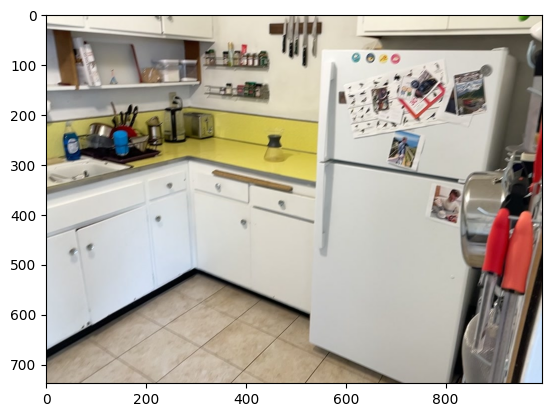

In [49]:
im = plt.imread("input2.jpg")
plt.imshow(im)

In [50]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[12/10 18:45:06 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


In [ ]:
thing_classes = np.array(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes)

In [ ]:
outputs["instances"].remove("pred_boxes")
outputs["instances"].remove("pred_classes")
outputs["instances"].remove("scores")

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.imsave("output1.jpg", out.get_image()[:, :, ::-1])

# Processing Pipeline for Kitchen Scene #

In [ ]:
QUERY = "refrigerator"
ALPHA = 1
SCENE = "waldo_kitchen"

FOLDER = f"nerfstudio/data/{SCENE}"
FOLDER_MASKED = f"nerfstudio/data/{SCENE}_{QUERY}_{ALPHA}"

In [ ]:
os.system(f"rm -rf {FOLDER_MASKED}")
os.system(f"cp -r {FOLDER} {FOLDER_MASKED}")

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
# outputs = predictor(im)

In [ ]:
thing_classes = np.array(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes)
print(thing_classes)


In [ ]:
index = np.where(thing_classes == QUERY)[0][0]
image_paths = glob.glob(f"{FOLDER_MASKED}/images*/*.jpg")

for i in tqdm(range(len(image_paths))):
    im_path = image_paths[i]
    im = plt.imread(im_path)

    outputs = predictor(im)
    outputs["instances"] = outputs["instances"][outputs["instances"].pred_classes == index]
    
    v = Visualizer(im, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"), alpha_value=ALPHA)
    plt.imsave(im_path, out.get_image())

# Processing Pipeline for 3dfront_0089_00 Scene from Instance Nerf paper #

In [61]:
QUERY = "all"
ALPHA = 0.5
SCENE = "3dfront_0089_00"

FOLDER = f"nerfstudio/data/{SCENE}"
FOLDER_MASKED = f"nerfstudio/data/{SCENE}_{QUERY}_{ALPHA}"

In [62]:
os.system(f"rm -rf {FOLDER_MASKED}")
os.system(f"cp -r {FOLDER} {FOLDER_MASKED}")

0

In [26]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

[12/11 04:39:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


In [27]:
thing_classes = np.array(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes)
print(thing_classes)

['person' 'bicycle' 'car' 'motorcycle' 'airplane' 'bus' 'train' 'truck'
 'boat' 'traffic light' 'fire hydrant' 'stop sign' 'parking meter' 'bench'
 'bird' 'cat' 'dog' 'horse' 'sheep' 'cow' 'elephant' 'bear' 'zebra'
 'giraffe' 'backpack' 'umbrella' 'handbag' 'tie' 'suitcase' 'frisbee'
 'skis' 'snowboard' 'sports ball' 'kite' 'baseball bat' 'baseball glove'
 'skateboard' 'surfboard' 'tennis racket' 'bottle' 'wine glass' 'cup'
 'fork' 'knife' 'spoon' 'bowl' 'banana' 'apple' 'sandwich' 'orange'
 'broccoli' 'carrot' 'hot dog' 'pizza' 'donut' 'cake' 'chair' 'couch'
 'potted plant' 'bed' 'dining table' 'toilet' 'tv' 'laptop' 'mouse'
 'remote' 'keyboard' 'cell phone' 'microwave' 'oven' 'toaster' 'sink'
 'refrigerator' 'book' 'clock' 'vase' 'scissors' 'teddy bear' 'hair drier'
 'toothbrush']


In [65]:
np.where(thing_classes == "chair")[0][0]

56

In [66]:
np.where(thing_classes == "couch")[0][0]

57

In [67]:
np.where(thing_classes == "dining table")[0][0]

60

In [68]:
np.where(thing_classes == "bed")[0][0]

59

In [69]:
np.where(thing_classes == "potted plant")[0][0]

58

In [70]:
# index = np.where(thing_classes == QUERY)[0][0]
image_paths = glob.glob(f"{FOLDER_MASKED}/images*/*.jpg")

for i in tqdm(range(len(image_paths))):
    im_path = image_paths[i]
    im = plt.imread(im_path)

    outputs = predictor(im)
    mask = (outputs["instances"].pred_classes == 57) | (outputs["instances"].pred_classes == 58) | (outputs["instances"].pred_classes == 60)
    outputs["instances"] = outputs["instances"][mask]
    # outputs["instances"] = outputs["instances"][outputs["instances"].pred_classes == index]
    
    v = Visualizer(im, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"), alpha_value=ALPHA)
    plt.imsave(im_path, out.get_image())
    

  0%|          | 0/285 [00:00<?, ?it/s]

100%|██████████| 285/285 [00:15<00:00, 18.18it/s]


# Generating Figure with different values of alphs for report #

In [3]:
import matplotlib.pyplot as plt

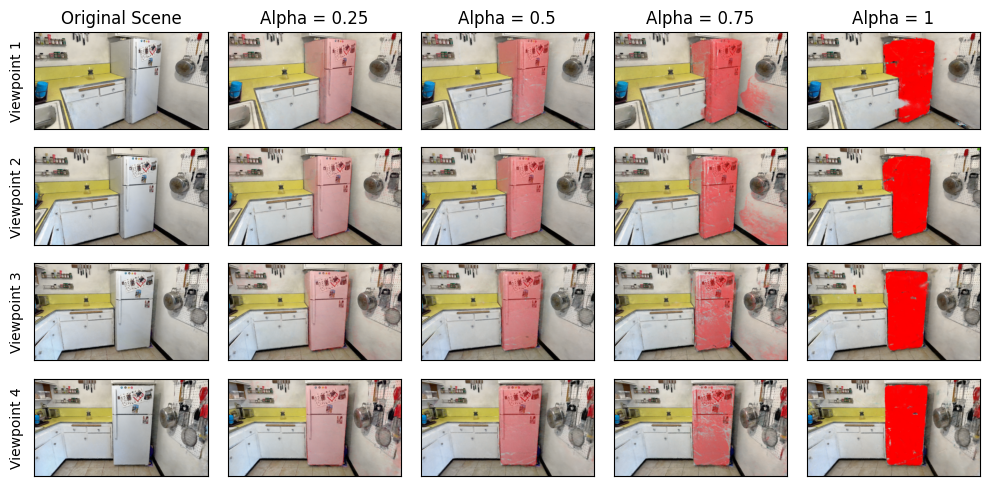

In [5]:
alpha_values = [0, 0.25, 0.5, 0.75, 1]

num_rows = 4
num_cols = len(alpha_values)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

for j, alpha in enumerate(alpha_values):
    for i in range(num_rows):
        img_path = f"renders/output/kitchen multiple cameras/{alpha}/0000{i}.png"
        img = plt.imread(img_path)
    
        axes[i, j].imshow(img)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

axes[0, 0].set_title("Original Scene")
axes[0, 1].set_title("Alpha = 0.25")
axes[0, 2].set_title("Alpha = 0.5")
axes[0, 3].set_title("Alpha = 0.75")
axes[0, 4].set_title("Alpha = 1")

axes[0, 0].set_ylabel("Viewpoint 1")
axes[1, 0].set_ylabel("Viewpoint 2")
axes[2, 0].set_ylabel("Viewpoint 3")
axes[3, 0].set_ylabel("Viewpoint 4")

plt.tight_layout()
plt.savefig("alpha_values.pdf", dpi=300)
plt.show()


# Visualizing results for 3dfront #

In [6]:
import matplotlib.pyplot as plt

j:  0 i:  0 img shape:  (1080, 1920, 3)
j:  0 i:  1 img shape:  (1080, 1920, 3)
j:  0 i:  2 img shape:  (1080, 1920, 3)
j:  1 i:  0 img shape:  (1080, 1920, 3)
j:  1 i:  1 img shape:  (1080, 1920, 3)
j:  1 i:  2 img shape:  (1080, 1920, 3)
j:  2 i:  0 img shape:  (1080, 1920, 3)
j:  2 i:  1 img shape:  (1080, 1920, 3)
j:  2 i:  2 img shape:  (1080, 1920, 3)
j:  3 i:  0 img shape:  (1240, 1652, 4)
j:  3 i:  1 img shape:  (1240, 1650, 4)
j:  3 i:  2 img shape:  (1240, 1650, 4)


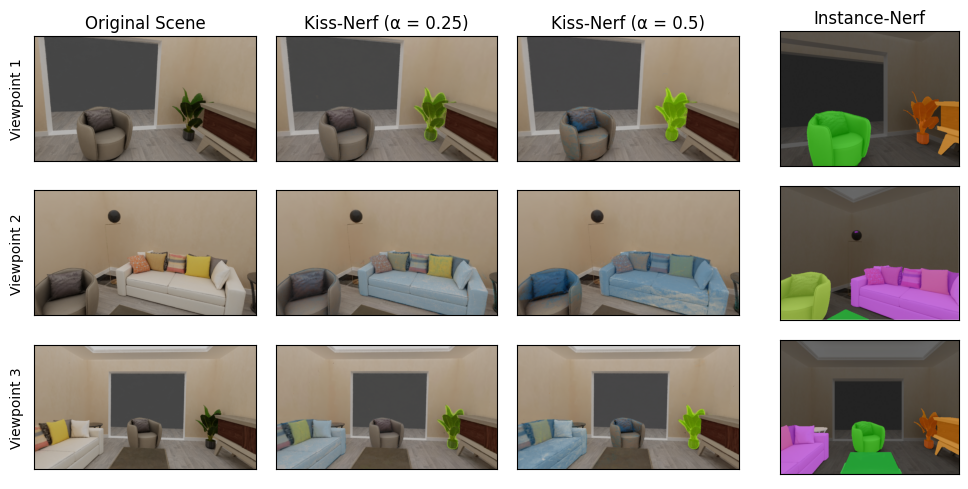

In [22]:
alpha_values = [0, 0.25, 0.5, "instance-nerf"]

num_rows = 3
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

for j, alpha in enumerate(alpha_values):
    for i in range(num_rows):
        img_path = f"renders/output/3dfront/{alpha}/{i}.png"
        img = plt.imread(img_path)
        # if j <3 and i == 0:
        #     img = img[:,150:1800,:]
        # elif j <3 and i == 1:
        #     img = img[:,0:1650,:]
        # elif j <3 and i == 2:
        #     img = img[:,150:1800,:]
        
        # print("j: ", j, "i: ", i, "img shape: ", img.shape)
        axes[i, j].imshow(img)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

axes[0, 0].set_title("Original Scene")
axes[0, 1].set_title("Kiss-Nerf (α = 0.25)")
axes[0, 2].set_title("Kiss-Nerf (α = 0.5)")
axes[0, 3].set_title("Instance-Nerf")

axes[0, 0].set_ylabel("Viewpoint 1")
axes[1, 0].set_ylabel("Viewpoint 2")
axes[2, 0].set_ylabel("Viewpoint 3")

plt.tight_layout()
# plt.savefig("3dfront results cropped.pdf", dpi=300)
plt.show()
